# Onderzoek Posts die Goed Presteren
Onze klant wil graag weten welke socialmedia posts goed presteren, kunnen we die groeperen en vergelijkbare factoren vinden?

# 1. Import Data

In [188]:
# importeren
import pandas as pd

In [189]:
# data importeren
df = pd.read_csv('clusterdata.csv')

In [190]:
#check
df.head()

user_id   published post_type  num_reactions  \
0  af60c7da-acb4-11ec-880a-a0cec8d2d278  1648512000     short            216   
1  af60c7e4-acb4-11ec-ab31-a0cec8d2d278  1647993600     short            196   
2  af60c7f9-acb4-11ec-bead-a0cec8d2d278  1647907200     short            138   
3  af60c815-acb4-11ec-a572-a0cec8d2d278  1648080000     short             81   
4  af60c80d-acb4-11ec-aeb5-a0cec8d2d278  1647820800     short            166   

   num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
0            58           5         53         18        12         21   
1            45           0         73         35         8         16   
2             6          13         59         33         5         16   
3             9           1          9         34        18         11   
4            53          11         75          0         5         17   

   num_sads  num_angrys  
0         6          43  
1        25          39  
2        12          13  
3         4           5  
4        24          45

# 2. Split Data in Training en Testing

In [191]:
# importeren
from sklearn.model_selection import train_test_split

In [192]:
# splitten
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [193]:
# check
print(train.shape)
print(test.shape)

(4932, 12)
(2115, 12)


In [194]:
train.head()

user_id   published post_type  \
5145  af60c7e1-acb4-11ec-a565-a0cec8d2d278  1647734400     short   
5940  af60c819-acb4-11ec-ac22-a0cec8d2d278  1647734400     video   
5046  af60c813-acb4-11ec-9b28-a0cec8d2d278  1647648000     video   
6089  af60c809-acb4-11ec-8a3c-a0cec8d2d278  1647388800     short   
3890  af60c7e2-acb4-11ec-9952-a0cec8d2d278  1648166400     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
5145            378             0          22        214         98        18   
5940            248            11          24        127         69        19   
5046            147            57           0         26         57        12   
6089            114            51           6          2         22         7   
3890            158            47           0         28         39         7   

      num_hahas  num_sads  num_angrys  
5145         18         7          23  
5940          8        25           0  
5046          4        14          34  
6089         21        22          40  
3890         12        33          39

In [195]:
test.head()

user_id   published post_type  \
4545  af60c7fa-acb4-11ec-9224-a0cec8d2d278  1648166400     short   
2627  af60c7d0-acb4-11ec-935e-a0cec8d2d278  1647820800     video   
1076  af60c80f-acb4-11ec-87f7-a0cec8d2d278  1647907200     video   
4824  af60c7e5-acb4-11ec-accd-a0cec8d2d278  1647388800      text   
3411  af60c7d5-acb4-11ec-8bf8-a0cec8d2d278  1647993600     short   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
4545            129            53           9         21         13        13   
2627            205             6          18        140         40         7   
1076            252             3          28        149         60        19   
4824            259            54           0        155         49        15   
3411            105            12           4         49         16        11   

      num_hahas  num_sads  num_angrys  
4545         19        29          34  
2627         15         3           0  
1076         14         8           2  
4824         26         0          14  
3411         10         8          11

# 3. Exploratory Data Analysis (EDA)

## Algemene EDA

In [196]:
# types
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [197]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 5145 to 2863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4932 non-null   object
 1   published      4932 non-null   int64 
 2   post_type      4932 non-null   object
 3   num_reactions  4932 non-null   int64 
 4   num_comments   4932 non-null   int64 
 5   num_shares     4932 non-null   int64 
 6   num_likes      4932 non-null   int64 
 7   num_loves      4932 non-null   int64 
 8   num_wows       4932 non-null   int64 
 9   num_hahas      4932 non-null   int64 
 10  num_sads       4932 non-null   int64 
 11  num_angrys     4932 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 500.9+ KB


In [198]:
# null
train.isnull().sum()

user_id          0
published        0
post_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## Summary Stats

In [199]:
# summary stats
train.describe()

published  num_reactions  num_comments   num_shares    num_likes  \
count  4.932000e+03    4932.000000   4932.000000  4932.000000  4932.000000   
mean   1.647943e+09     189.214923     29.540552     9.145985    85.684712   
std    3.513294e+05      75.843449     20.669640     7.807651    67.498828   
min    1.647389e+09      27.000000      0.000000     0.000000     0.000000   
25%    1.647648e+09     121.000000     10.000000     3.000000    19.000000   
50%    1.647994e+09     191.000000     20.000000     7.000000    79.000000   
75%    1.648253e+09     256.000000     50.000000    14.000000   150.000000   
max    1.648512e+09     378.000000     70.000000    37.000000   239.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  
count  4932.000000  4932.000000  4932.000000  4932.000000  4932.000000  
mean     41.381387    14.974250    18.666464    13.934712    14.573398  
std      24.422694     5.012694     8.141871     9.826429    16.039171  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      23.000000    12.000000    13.000000     6.000000     1.000000  
50%      37.000000    15.000000    17.000000    13.000000     8.000000  
75%      57.000000    18.000000    24.000000    20.000000    23.000000  
max     127.000000    34.000000    45.000000    51.000000    67.000000

num_reactions is het totaal van:
- num_likes
- num_wows
- num_hahas
- num_sads
- num-angrys

In [200]:
# 1.5 IQR Rule voor de Upper Range
150+1.5*(150-19)

346.5

In [201]:
# summary stats 
train.describe(include='object')

user_id post_type
count                                   4932      4932
unique                                   100         4
top     af60c7c8-acb4-11ec-adad-a0cec8d2d278     short
freq                                      71      3081

## Plot Distributions

In [202]:
# import
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

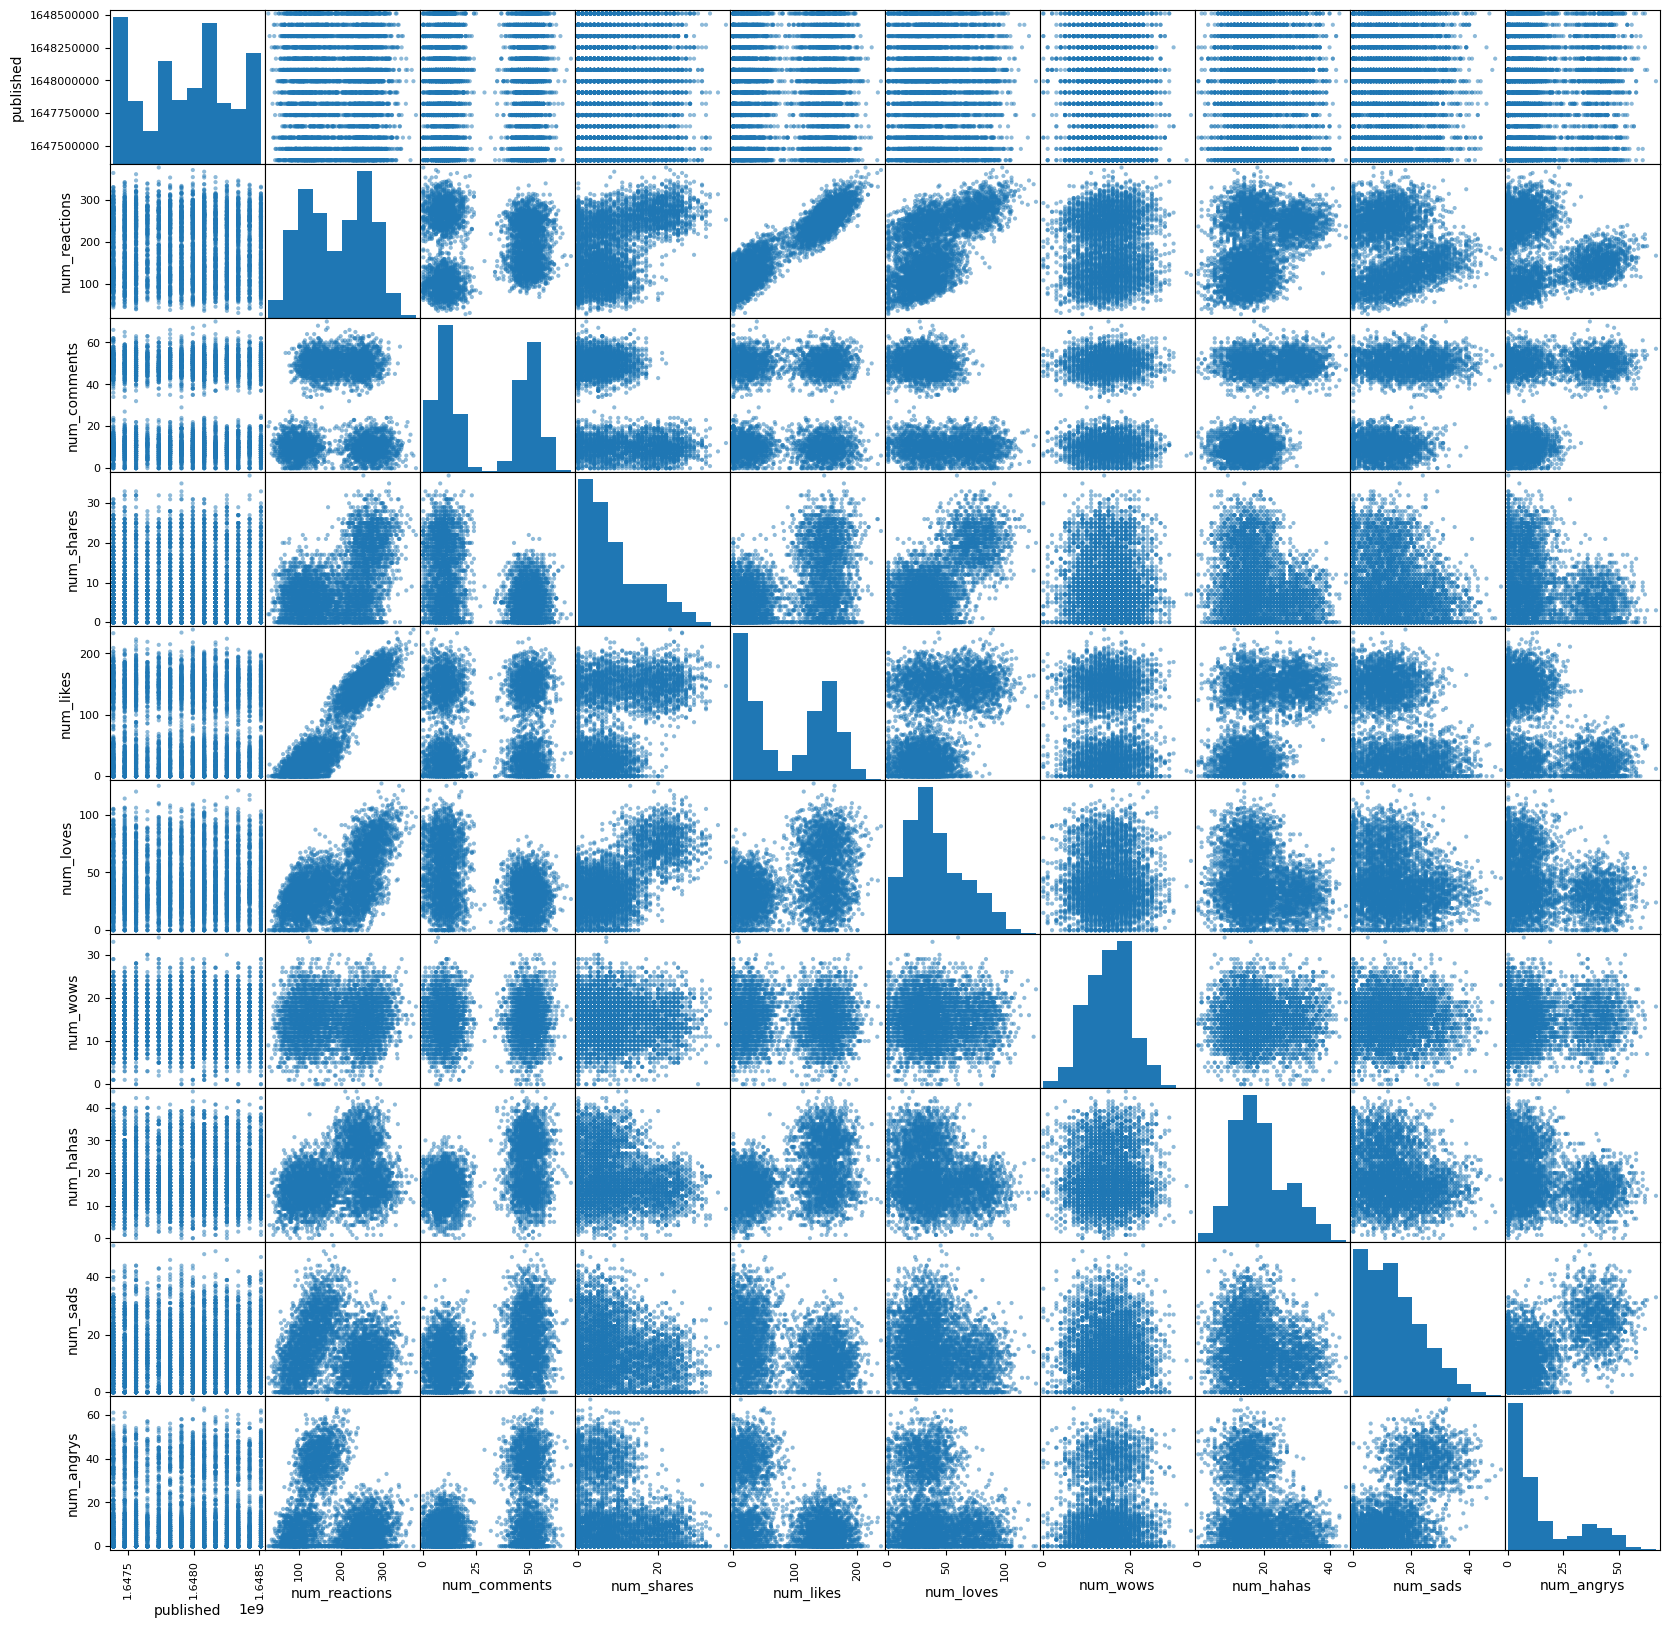

In [203]:
# scatter matrix
scatter_matrix(train, figsize=(20,20))
plt.show()

## Posts Types

In [204]:
# types
train.post_type.unique()

array(['short', 'video', 'photo', 'text'], dtype=object)

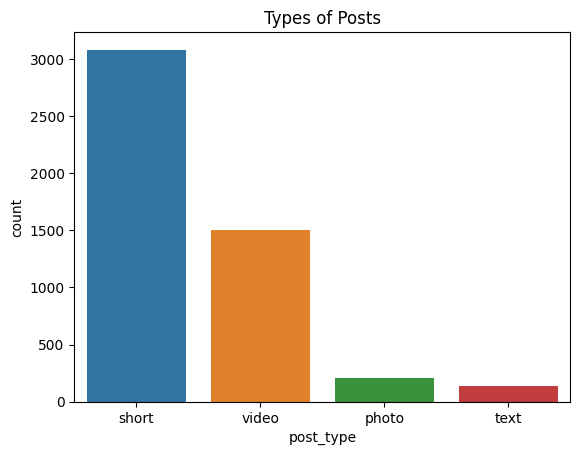

In [205]:
# countplot
sns.countplot(
    data=train,
    x='post_type').set_title('Types of Posts')
plt.show()

## Relatie tussen Post Type en Responses?

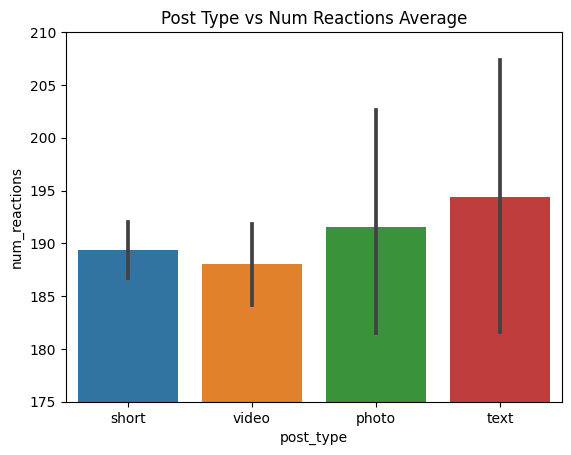

In [206]:
# barplot
sns.barplot(
    data=train,
    x='post_type',
    y='num_reactions').set_title('Post Type vs Num Reactions Average')
plt.ylim((175,210))
plt.show()

## Status Published (date time)

In [207]:
# check, lijkt om timestamp
train['published']

5145    1647734400
5940    1647734400
5046    1647648000
6089    1647388800
3890    1648166400
           ...    
664     1648080000
3276    1647993600
1318    1648166400
723     1648252800
2863    1648252800
Name: published, Length: 4932, dtype: int64

In [208]:
# check met 1647734400
pd.to_datetime(1647734400, unit='s')

Timestamp('2022-03-20 00:00:00')

In [209]:
# convert naar timestamp
train['timestamp'] = pd.to_datetime(train['published'], unit='s')

In [210]:
# check
train[['timestamp']].head()

timestamp
5145 2022-03-20
5940 2022-03-20
5046 2022-03-19
6089 2022-03-16
3890 2022-03-25

In [211]:
# check twee
train.dtypes

user_id                  object
published                 int64
post_type                object
num_reactions             int64
num_comments              int64
num_shares                int64
num_likes                 int64
num_loves                 int64
num_wows                  int64
num_hahas                 int64
num_sads                  int64
num_angrys                int64
timestamp        datetime64[ns]
dtype: object

## Relatie met tijd?

In [212]:
# time kolommen aanmaken
train['day'] = train['timestamp'].dt.day
train['day_name'] = train['timestamp'].dt.day_of_week
train['monthstart'] = train['timestamp'].dt.is_month_start
train['monthend'] = train['timestamp'].dt.is_month_end
train['quarterstart'] = train['timestamp'].dt.is_quarter_start
train['quarterend'] = train['timestamp'].dt.is_quarter_end
train['month'] = train['timestamp'].dt.month


In [213]:
# check
train.head()

user_id   published post_type  \
5145  af60c7e1-acb4-11ec-a565-a0cec8d2d278  1647734400     short   
5940  af60c819-acb4-11ec-ac22-a0cec8d2d278  1647734400     video   
5046  af60c813-acb4-11ec-9b28-a0cec8d2d278  1647648000     video   
6089  af60c809-acb4-11ec-8a3c-a0cec8d2d278  1647388800     short   
3890  af60c7e2-acb4-11ec-9952-a0cec8d2d278  1648166400     video   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
5145            378             0          22        214         98        18   
5940            248            11          24        127         69        19   
5046            147            57           0         26         57        12   
6089            114            51           6          2         22         7   
3890            158            47           0         28         39         7   

      num_hahas  num_sads  num_angrys  timestamp  day  day_name  monthstart  \
5145         18         7          23 2022-03-20   20         6       False   
5940          8        25           0 2022-03-20   20         6       False   
5046          4        14          34 2022-03-19   19         5       False   
6089         21        22          40 2022-03-16   16         2       False   
3890         12        33          39 2022-03-25   25         4       False   

      monthend  quarterstart  quarterend  month  
5145     False         False       False      3  
5940     False         False       False      3  
5046     False         False       False      3  
6089     False         False       False      3  
3890     False         False       False      3

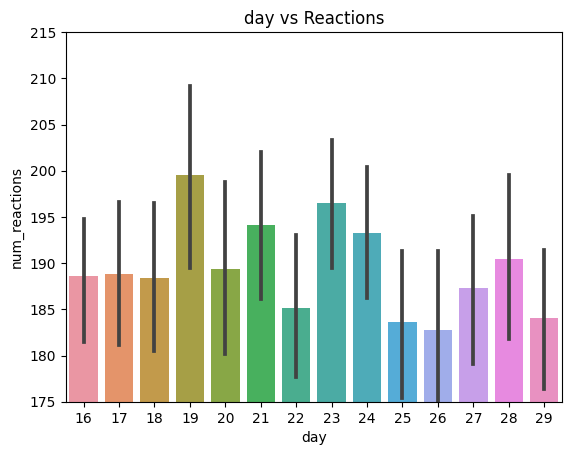

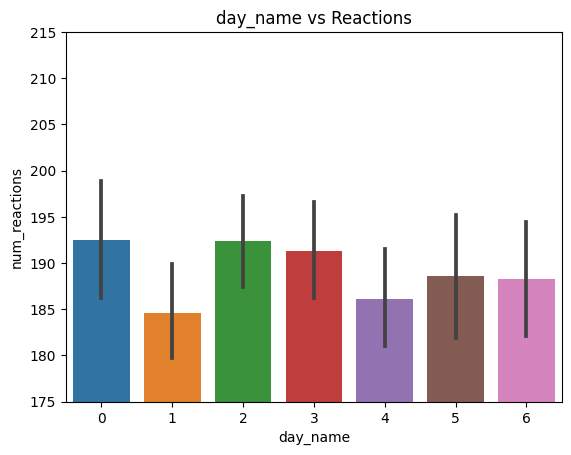

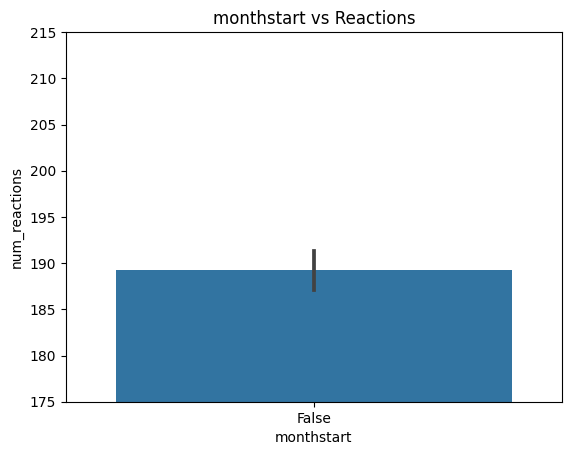

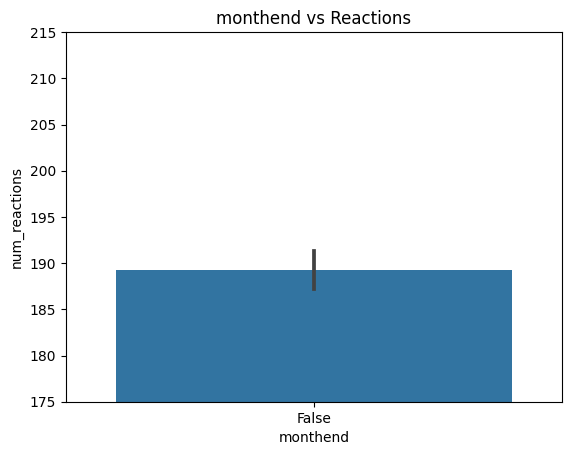

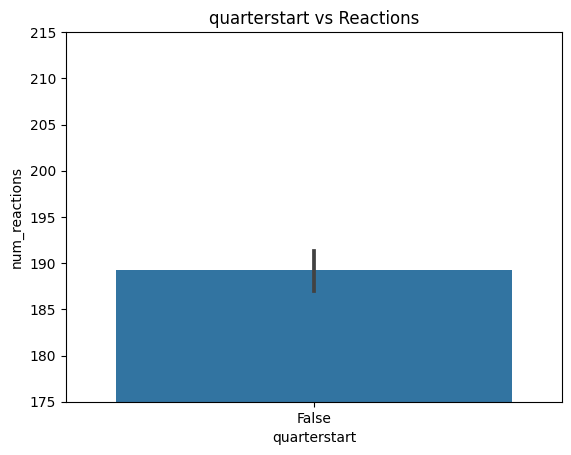

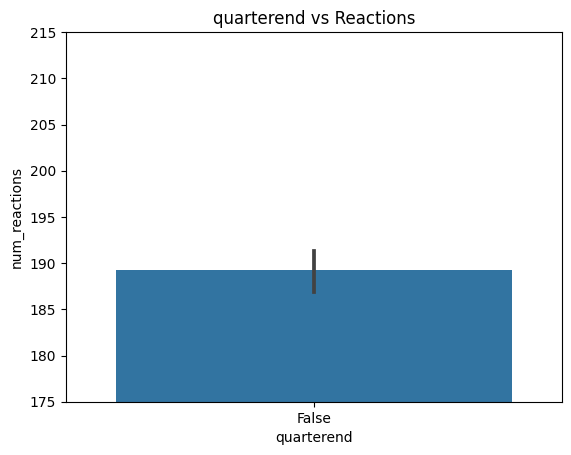

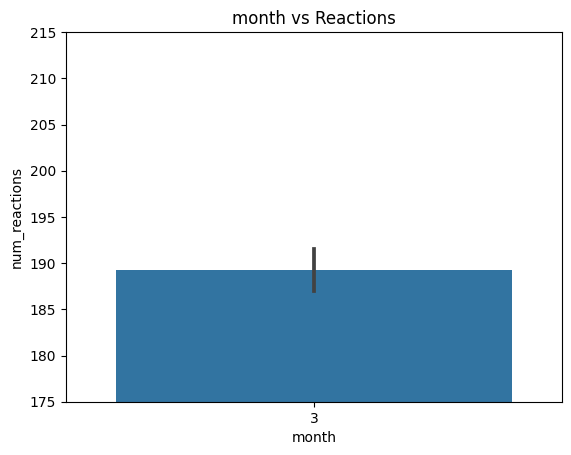

In [214]:
# check relaties
for col in train.columns[-7:]:
    sns.barplot(data=train, x=col, y='num_reactions').set_title(f'{col} vs Reactions')
    plt.ylim((175,215))
    plt.show()

In [215]:
# drop de onnodige kollomen (omdat er maar 1 maand aan data is)
train = train.drop(['timestamp', 'published', 'day', 'monthstart', 'monthend', 'quarterstart', 'quarterend', 'month'], axis=1)

In [216]:
# check
train.columns

Index(['user_id', 'post_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'day_name'],
      dtype='object')

# 4. Data Preprocessing

## Scale Features

In [217]:
# import
import numpy as np
from sklearn.preprocessing import StandardScaler

In [218]:
# StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train.drop(['user_id', 'post_type', 'day_name'], axis=1).to_numpy())

In [219]:
# check
pd.DataFrame(scaled).describe()

0             1             2             3             4  \
count  4.932000e+03  4.932000e+03  4.932000e+03  4.932000e+03  4.932000e+03   
mean  -9.940683e-17  8.355936e-17  1.051695e-16 -8.211869e-17 -9.076276e-17   
std    1.000101e+00  1.000101e+00  1.000101e+00  1.000101e+00  1.000101e+00   
min   -2.139029e+00 -1.429321e+00 -1.171532e+00 -1.269554e+00 -1.694554e+00   
25%   -8.995087e-01 -9.454704e-01 -7.872545e-01 -9.880390e-01 -7.527118e-01   
50%    2.353872e-02 -4.616200e-01 -2.748846e-01 -9.904453e-02 -1.794164e-01   
75%    8.806542e-01  9.899313e-01  6.217628e-01  9.529322e-01  6.395771e-01   
max    2.489394e+00  1.957632e+00  3.567890e+00  2.271607e+00  3.506054e+00   

                  5             6             7             8  
count  4.932000e+03  4.932000e+03  4.932000e+03  4.932000e+03  
mean  -4.898308e-17 -1.959323e-16  4.394070e-17 -1.152543e-17  
std    1.000101e+00  1.000101e+00  1.000101e+00  1.000101e+00  
min   -2.987569e+00 -2.292883e+00 -1.418229e+00 -9.087051e-01  
25%   -5.934038e-01 -6.960364e-01 -8.075687e-01 -8.463514e-01  
50%    5.137520e-03 -2.046990e-01 -9.513190e-02 -4.098756e-01  
75%    6.036788e-01  6.551414e-01  6.173049e-01  5.254297e-01  
max    3.795899e+00  3.234663e+00  3.772382e+00  3.268992e+00

## One Hot Encode Status Type

In [220]:
# import
from sklearn.preprocessing import OneHotEncoder

In [221]:
onehot = OneHotEncoder(handle_unknown='ignore')
encode = onehot.fit_transform(train[['user_id', 'post_type', 'day_name']]).toarray()

In [222]:
onehot.get_feature_names_out()

array(['user_id_af60c7c0-acb4-11ec-b646-a0cec8d2d278',
       'user_id_af60c7c1-acb4-11ec-8cb0-a0cec8d2d278',
       'user_id_af60c7c2-acb4-11ec-8608-a0cec8d2d278',
       'user_id_af60c7c3-acb4-11ec-97e2-a0cec8d2d278',
       'user_id_af60c7c4-acb4-11ec-9d00-a0cec8d2d278',
       'user_id_af60c7c5-acb4-11ec-83fd-a0cec8d2d278',
       'user_id_af60c7c6-acb4-11ec-918b-a0cec8d2d278',
       'user_id_af60c7c7-acb4-11ec-b103-a0cec8d2d278',
       'user_id_af60c7c8-acb4-11ec-adad-a0cec8d2d278',
       'user_id_af60c7c9-acb4-11ec-9a3b-a0cec8d2d278',
       'user_id_af60c7ca-acb4-11ec-87b8-a0cec8d2d278',
       'user_id_af60c7cb-acb4-11ec-b3b4-a0cec8d2d278',
       'user_id_af60c7cc-acb4-11ec-b9c1-a0cec8d2d278',
       'user_id_af60c7cd-acb4-11ec-a542-a0cec8d2d278',
       'user_id_af60c7ce-acb4-11ec-b2df-a0cec8d2d278',
       'user_id_af60c7cf-acb4-11ec-96a2-a0cec8d2d278',
       'user_id_af60c7d0-acb4-11ec-935e-a0cec8d2d278',
       'user_id_af60c7d1-acb4-11ec-ab28-a0cec8d2d278',
       'us

In [223]:
# samenvoegen
X_train = np.c_[scaled, encode]

In [224]:
#check
X_train[0]

array([ 2.48939388, -1.42932083,  1.64650258,  1.90119298,  2.31851384,
        0.60367879, -0.08186465, -0.70579203,  0.52542966,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# 5. Modelling

## Fit Models

In [225]:
# import
from sklearn.cluster import KMeans

In [226]:
# fit models met verschillende k waardes
fit_models = {}
for k in range(2,21):
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    fit_models[k] = model

C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\stefa\Documents\Fullstack ML\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

In [227]:
#check
fit_models

{2: KMeans(n_clusters=2),
 3: KMeans(n_clusters=3),
 4: KMeans(n_clusters=4),
 5: KMeans(n_clusters=5),
 6: KMeans(n_clusters=6),
 7: KMeans(n_clusters=7),
 8: KMeans(),
 9: KMeans(n_clusters=9),
 10: KMeans(n_clusters=10),
 11: KMeans(n_clusters=11),
 12: KMeans(n_clusters=12),
 13: KMeans(n_clusters=13),
 14: KMeans(n_clusters=14),
 15: KMeans(n_clusters=15),
 16: KMeans(n_clusters=16),
 17: KMeans(n_clusters=17),
 18: KMeans(n_clusters=18),
 19: KMeans(n_clusters=19),
 20: KMeans(n_clusters=20)}

## Beste Cluster size met Elbow Method

In [228]:
# inertia lijst maken
results = []
for k, model in fit_models.items():
    res = model.inertia_
    results.append(res)

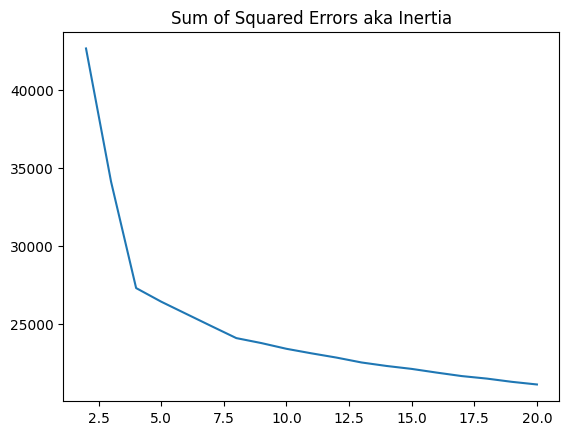

In [229]:
# visualiseer
plt.title('Sum of Squared Errors aka Inertia')
plt.plot(range(2,21), results)
plt.show()

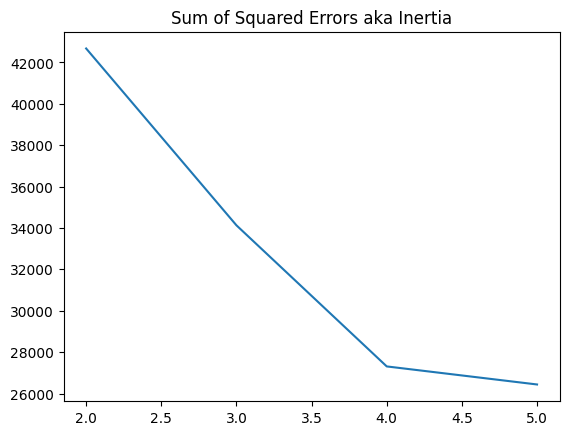

In [230]:
# visualiseer inzoomen
plt.title('Sum of Squared Errors aka Inertia')
plt.plot(range(2,6), results[:4])
plt.show()

# 6. Evaluate Models

## Kies Model en Predict

In [231]:
# model met cluster aantal 4
model = fit_models[4]

In [232]:
def transform(raw_df, onehot, scaler): 
    X = raw_df.copy()
    X['timestamp'] = pd.to_datetime(X['published'], unit='s')
    X['day_name'] = X['timestamp'].dt.day_name()
    X = X.drop(['timestamp', 'published'], axis=1)
    
    encoded = onehot.transform(X[['user_id','post_type','day_name']])
    scaled = scaler.transform(X.drop(['user_id','post_type'
                                      ,'day_name'], axis=1).to_numpy())
    
    return np.c_[scaled, encoded.toarray()]

In [233]:
# transform X_test
X_test = transform(test, onehot, scaler); X_test

array([[-0.79401753,  1.13508641, -0.01869963, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2081482 , -1.13901058,  1.13413267, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82790859, -1.28416571,  2.41505745, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.05207724, -0.84870033,  0.87794771, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58303527,  0.8931612 , -1.17153193, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34217785,  1.18347145,  0.10939285, ...,  0.        ,
         0.        ,  0.        ]])

In [234]:
# predict
clusters = model.predict(X_test)
test['clusters'] = clusters
test.head()

user_id   published post_type  \
4545  af60c7fa-acb4-11ec-9224-a0cec8d2d278  1648166400     short   
2627  af60c7d0-acb4-11ec-935e-a0cec8d2d278  1647820800     video   
1076  af60c80f-acb4-11ec-87f7-a0cec8d2d278  1647907200     video   
4824  af60c7e5-acb4-11ec-accd-a0cec8d2d278  1647388800      text   
3411  af60c7d5-acb4-11ec-8bf8-a0cec8d2d278  1647993600     short   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
4545            129            53           9         21         13        13   
2627            205             6          18        140         40         7   
1076            252             3          28        149         60        19   
4824            259            54           0        155         49        15   
3411            105            12           4         49         16        11   

      num_hahas  num_sads  num_angrys  clusters  
4545         19        29          34         3  
2627         15         3           0         2  
1076         14         8           2         2  
4824         26         0          14         0  
3411         10         8          11         1

## Visualiseer

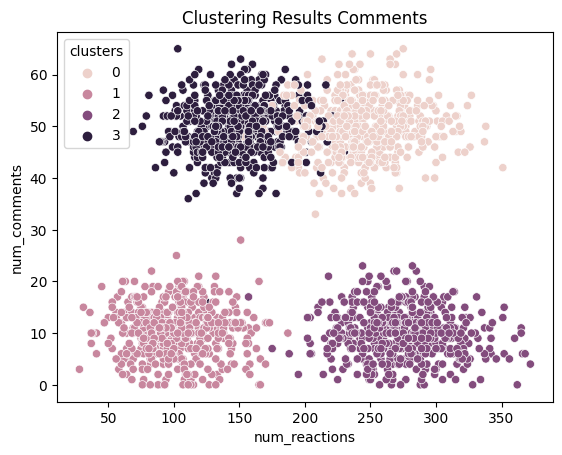

In [235]:
# reslutaat visualiseren
plt.title('Clustering Results Comments')
sns.scatterplot(x='num_reactions', y='num_comments', hue='clusters', data=test)
plt.show()  

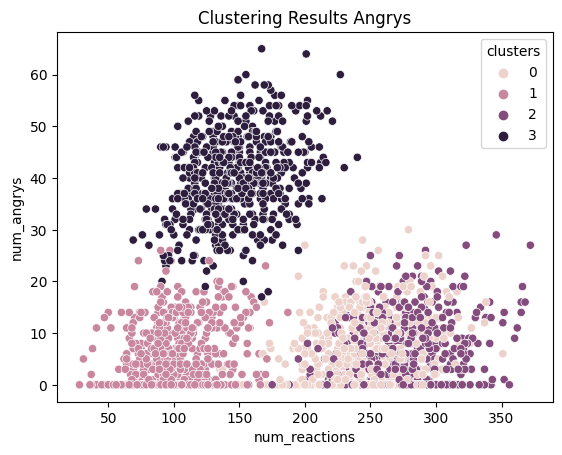

In [236]:
plt.title('Clustering Results Angrys')
sns.scatterplot(x='num_reactions', y='num_angrys', hue='clusters', data=test)
plt.show()

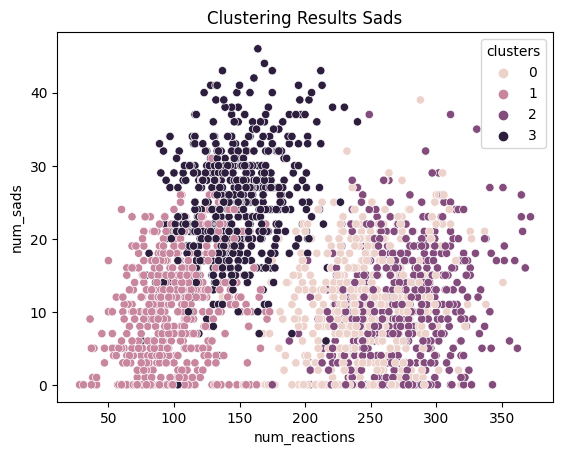

In [237]:
plt.title('Clustering Results Sads')
sns.scatterplot(x='num_reactions', y='num_sads', hue='clusters', data=test)
plt.show()

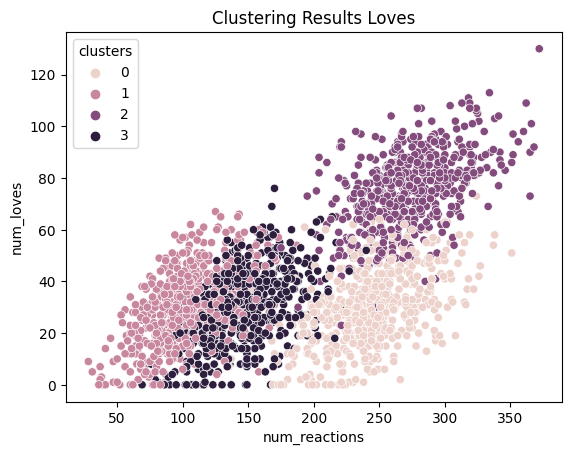

In [238]:
plt.title('Clustering Results Loves')
sns.scatterplot(x='num_reactions', y='num_loves', hue='clusters', data=test)
plt.show()

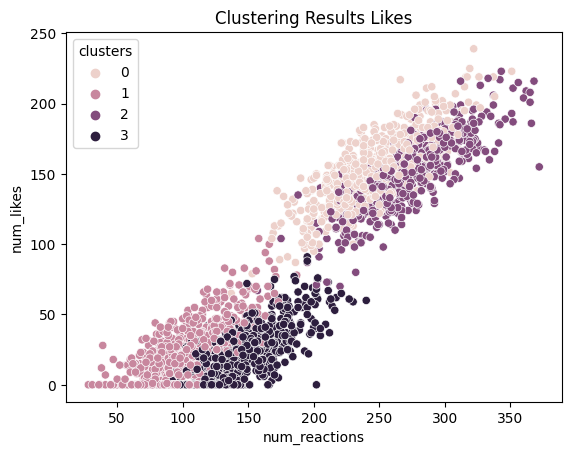

In [239]:
plt.title('Clustering Results Likes')
sns.scatterplot(x='num_reactions', y='num_likes', hue='clusters', data=test)
plt.show()

## Heeft Cluster 0 een hogere Reaction Average?
- Alternative specifies what the alternative hypothesis represents
- two-sided: $H_0:a=b$, $H_a:a \neq b$
- less: $H_0:a>=b$, $H_a:a<b$
- greater: $H_0:a<=b$, $H_a:a>b$                

In [240]:
# import
from scipy.stats import ttest_ind

In [241]:
# Sample 1: Cluster 0
cluster_zero_samples = test[test['clusters']==0]['num_reactions']
# Sample 2: Cluster 1,2,3
cluster_other_samples = test[test['clusters']!=0]['num_reactions']

In [242]:
# check
print(cluster_zero_samples.shape)
print(cluster_other_samples.shape)

(524,)
(1591,)


# Hypothesis Test 
1. 95%, alpha 1-0.95 = 0.05 
2. Formulate hypotheses  
- H0:  Cluster 0 number of reactions <= Cluster 1,2,3 number of reactions
- HA:  Cluster 0 mean number of reactions > Cluster 1,2,3 number of reactions
3. pvalue < 0.05, reject our null hypothesis which is lending support to the HA



In [243]:
comparison = ttest_ind(cluster_zero_samples, cluster_other_samples, 
                       alternative='greater', equal_var=False)

In [244]:
comparison.pvalue

1.8611269738242154e-156

Cluster 0 performed goed tegenover de andere clusters

# 7. Deploy

## Score alle data

In [245]:
# transform
X = transform(df, onehot, scaler)

In [246]:
clusters = model.predict(X)

In [248]:
# sla CSV op
df['cluster'] = clusters
df.to_csv('cluster_result.csv')

## Install Dependencies voor Dash

In [249]:
# install
!pip install plotly dash

     ---------------------------------------- 15.2/15.2 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 10.2/10.2 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 101.8/101.8 kB ? eta 0:00:00
     ------------------------------------- 233.6/233.6 kB 14.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
